In [1]:
#import packages
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
#from intake import open_catalog
import cartopy.io.shapereader as shpreader
#import mygrads as mg
import matplotlib as mpl
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
from cartopy.feature import NaturalEarthFeature
from cartopy.feature import COASTLINE
import math
from sklearn.neighbors import NearestNeighbors

In [2]:
f='/project/xprecip/merra2_ncfiles/slp/slp_sixhourly.nc'
DS_slp_6hr=xr.open_dataset(f)
DS_slp_6hr

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 61600)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
Data variables:
    SLP      (time, lat, lon) float32 ...

In [3]:
slp_array=DS_slp_6hr['SLP']
slp_array

<xarray.DataArray 'SLP' (time: 61600, lat: 66, lon: 120)>
[487872000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [4]:
winter_selected=slp_array.isel(time=slp_array.time.dt.season.isin(['DJF']))
winter_selected

<xarray.DataArray 'SLP' (time: 15400, lat: 66, lon: 120)>
[121968000 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [10]:
slp_hpa=winter_selected*10e-3 #converts to hectopascals
slp_hpa

<xarray.DataArray 'SLP' (time: 15400, lat: 66, lon: 120)>
array([[[1018.0071 , 1018.0396 , 1018.07874, ..., 1017.5296 ,
         1017.5329 , 1017.5704 ],
        [1018.3212 , 1018.36206, 1018.40375, ..., 1017.8329 ,
         1017.7962 , 1017.8221 ],
        [1018.6371 , 1018.67706, 1018.7271 , ..., 1018.0396 ,
         1018.0687 , 1018.06537],
        ...,
        [1004.41754, 1004.5886 , 1004.4153 , ...,  981.00037,
          980.04285,  979.5071 ],
        [1004.59216, 1004.8458 , 1005.1027 , ...,  981.0954 ,
          980.3854 ,  979.98535],
        [1005.0246 , 1005.37585, 1005.82684, ...,  981.4029 ,
          980.97125,  980.6046 ]],

       [[1018.92114, 1018.86444, 1018.8128 , ..., 1016.0812 ,
         1016.11115, 1016.0869 ],
        [1019.1828 , 1019.14276, 1019.08276, ..., 1016.30115,
         1016.32367, 1016.31946],
        [1019.46277, 1019.4119 , 1019.3578 , ..., 1016.4661 ,
         1016.50366, 1016.54193],
...
        [1003.9956 , 1004.63226, 1004.5235 , ...,  992.8877 ,
          992.956  ,  992.9656 ],
        [1003.72894, 1004.586  , 1004.72437, ...,  994.1981 ,
          993.98395,  993.80725],
        [1003.7658 , 1004.33185, 1004.85974, ...,  995.43396,
          995.02936,  994.6881 ]],

       [[1021.29156, 1021.1265 , 1020.98065, ..., 1018.2882 ,
         1018.3932 , 1018.4449 ],
        [1021.679  , 1021.5324 , 1021.3832 , ..., 1018.6507 ,
         1018.70154, 1018.7782 ],
        [1022.0774 , 1021.9315 , 1021.7757 , ..., 1018.95654,
         1019.004  , 1019.054  ],
        ...,
        [1008.1838 , 1008.04254, 1007.09717, ...,  993.70526,
          993.1907 ,  992.8015 ],
        [1007.6574 , 1007.78925, 1007.7101 , ...,  994.9524 ,
          994.1713 ,  993.4965 ],
        [1007.31366, 1007.5503 , 1007.80927, ...,  996.1324 ,
          995.2534 ,  994.4493 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [9]:
hour0=slp_hpa.isel(time=slp_hpa.time.dt.hour.isin([0]))
hour0

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[1018.0071 , 1018.0396 , 1018.07874, ..., 1017.5296 ,
         1017.5329 , 1017.5704 ],
        [1018.3212 , 1018.36206, 1018.40375, ..., 1017.8329 ,
         1017.7962 , 1017.8221 ],
        [1018.6371 , 1018.67706, 1018.7271 , ..., 1018.0396 ,
         1018.0687 , 1018.06537],
        ...,
        [1004.41754, 1004.5886 , 1004.4153 , ...,  981.00037,
          980.04285,  979.5071 ],
        [1004.59216, 1004.8458 , 1005.1027 , ...,  981.0954 ,
          980.3854 ,  979.98535],
        [1005.0246 , 1005.37585, 1005.82684, ...,  981.4029 ,
          980.97125,  980.6046 ]],

       [[1017.78186, 1017.8068 , 1017.8177 , ..., 1017.3093 ,
         1017.38434, 1017.4794 ],
        [1018.1193 , 1018.14185, 1018.1485 , ..., 1017.5352 ,
         1017.5877 , 1017.6577 ],
        [1018.45935, 1018.4727 , 1018.4735 , ..., 1017.7085 ,
         1017.796  , 1017.8477 ],
...
        [1007.25446, 1006.83276, 1005.614  , ..., 1005.66864,
         1005.44116, 1005.1882 ],
        [1007.1649 , 1006.12445, 1006.19617, ..., 1004.7997 ,
         1004.62317, 1004.4203 ],
        [1006.2132 , 1005.8407 , 1006.1115 , ..., 1004.05005,
         1003.86304, 1003.6463 ]],

       [[1021.473  , 1021.3938 , 1021.32965, ..., 1019.5997 ,
         1019.70215, 1019.7788 ],
        [1021.9105 , 1021.8163 , 1021.73883, ..., 1019.9847 ,
         1020.0613 , 1020.14465],
        [1022.31555, 1022.2063 , 1022.1247 , ..., 1020.31305,
         1020.3938 , 1020.5105 ],
        ...,
        [1011.5843 , 1012.4322 , 1012.56714, ...,  996.81696,
          996.96155,  997.0024 ],
        [1012.49255, 1012.9025 , 1013.29803, ...,  997.0082 ,
          997.2284 ,  997.2365 ],
        [1012.7175 , 1012.98175, 1013.35254, ...,  997.1928 ,
          997.3944 ,  997.43134]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [10]:
window=3
rolling_mean0=hour0.rolling(time=window).mean(dim='time')
rolling_mean0

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1018.2702 , 1017.2653 , 1015.81836, ..., 1010.6869 ,
         1010.049  , 1009.1758 ],
        [1017.3606 , 1016.39075, 1016.29266, ..., 1009.854  ,
         1009.14343, 1008.2733 ],
        [1015.8563 , 1015.82587, 1016.2109 , ..., 1008.96747,
         1008.1576 , 1007.2462 ]],

       [[1022.0163 , 1022.0143 , 1021.9943 , ..., 1020.9032 ,
         1021.06854, 1021.2118 ],
        [1022.4385 , 1022.432  , 1022.42505, ..., 1021.23584,
         1021.3928 , 1021.5526 ],
        [1022.87036, 1022.8349 , 1022.80273, ..., 1021.5783 ,
         1021.7229 , 1021.89734],
        ...,
        [1013.0657 , 1012.89124, 1011.98425, ..., 1005.5613 ,
         1005.42773, 1005.19275],
        [1013.07214, 1012.6189 , 1012.7633 , ..., 1005.0791 ,
         1004.9911 , 1004.7645 ],
        [1012.40344, 1012.3988 , 1012.75244, ..., 1004.5897 ,
         1004.46094, 1004.2257 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [11]:
climo_00z=rolling_mean0.groupby('time.hour').mean(dim='time')
climo_00z

<xarray.DataArray 'SLP' (hour: 1, lat: 66, lon: 120)>
array([[[1018.2732 , 1018.24994, 1018.2196 , ..., 1019.0016 ,
         1019.03235, 1019.0587 ],
        [1018.57574, 1018.5441 , 1018.5112 , ..., 1019.2509 ,
         1019.2773 , 1019.3037 ],
        [1018.8609 , 1018.8316 , 1018.7937 , ..., 1019.4889 ,
         1019.5148 , 1019.5445 ],
        ...,
        [1012.5038 , 1012.36786, 1012.1017 , ..., 1006.5    ,
         1006.1429 , 1005.77704],
        [1012.2841 , 1012.1806 , 1012.2106 , ..., 1006.13403,
         1005.7532 , 1005.37085],
        [1011.6478 , 1012.00934, 1012.4712 , ..., 1005.74567,
         1005.3206 , 1004.9242 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0

In [12]:
hour6=slp_hpa.isel(time=slp_hpa.time.dt.hour.isin([6]))
hour6

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[1018.92114, 1018.86444, 1018.8128 , ..., 1016.0812 ,
         1016.11115, 1016.0869 ],
        [1019.1828 , 1019.14276, 1019.08276, ..., 1016.30115,
         1016.32367, 1016.31946],
        [1019.46277, 1019.4119 , 1019.3578 , ..., 1016.4661 ,
         1016.50366, 1016.54193],
        ...,
        [1008.8563 , 1009.0275 , 1009.2582 , ...,  984.6853 ,
          984.06696,  983.4778 ],
        [1008.5524 , 1008.72656, 1008.81177, ...,  984.42694,
          983.7794 ,  983.12946],
        [1008.3488 , 1008.4124 , 1008.68567, ...,  984.1328 ,
          983.3986 ,  982.6203 ]],

       [[1018.6527 , 1018.63934, 1018.6144 , ..., 1016.4169 ,
         1016.5185 , 1016.6327 ],
        [1018.90686, 1018.89435, 1018.8602 , ..., 1016.59686,
         1016.67847, 1016.78186],
        [1019.1552 , 1019.1377 , 1019.0985 , ..., 1016.7727 ,
         1016.8527 , 1016.9219 ],
...
        [1007.6391 , 1007.38   , 1006.4566 , ..., 1003.3318 ,
         1003.4806 , 1003.5252 ],
        [1007.67706, 1006.71124, 1006.92706, ..., 1002.26746,
         1002.4465 , 1002.543  ],
        [1006.6925 , 1006.6979 , 1007.14624, ..., 1001.3622 ,
         1001.511  , 1001.57996]],

       [[1021.4869 , 1021.31934, 1021.08936, ..., 1018.1635 ,
         1018.2277 , 1018.2952 ],
        [1021.811  , 1021.6577 , 1021.4427 , ..., 1018.47437,
         1018.5485 , 1018.6035 ],
        [1022.1477 , 1021.996  , 1021.7994 , ..., 1018.76685,
         1018.86346, 1018.9577 ],
        ...,
        [1004.13434, 1004.9253 , 1005.15436, ...,  994.3535 ,
          994.56976,  994.81146],
        [1005.51624, 1006.22754, 1006.8562 , ...,  995.211  ,
          995.4202 ,  995.50977],
        [1006.97284, 1007.5734 , 1008.3485 , ...,  995.9656 ,
          996.0277 ,  996.001  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2022-02-28T06:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [13]:
window=3
rolling_mean6=hour6.rolling(time=window).mean(dim='time')
rolling_mean6

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1016.91034, 1015.97015, 1014.4739 , ..., 1009.8274 ,
         1009.41736, 1008.8336 ],
        [1016.3254 , 1015.16455, 1014.9724 , ..., 1008.894  ,
         1008.43506, 1007.8286 ],
        [1014.9516 , 1014.8158 , 1015.0565 , ..., 1007.87   ,
         1007.3097 , 1006.6684 ]],

       [[1022.37744, 1022.2773 , 1022.1212 , ..., 1019.6218 ,
         1019.78754, 1019.9123 ],
        [1022.79736, 1022.727  , 1022.59424, ..., 1019.9684 ,
         1020.15674, 1020.2882 ],
        [1023.24365, 1023.13245, 1023.0248 , ..., 1020.30554,
         1020.48425, 1020.65576],
        ...,
        [1009.10516, 1009.0248 , 1008.167  , ..., 1002.8197 ,
         1002.8017 , 1002.7213 ],
        [1009.5853 , 1009.0454 , 1009.2673 , ..., 1002.51654,
         1002.4999 , 1002.38275],
        [1009.4442 , 1009.508  , 1009.9338 , ..., 1002.1826 ,
         1002.092  , 1001.92206]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2022-02-28T06:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [14]:
climo_06z=rolling_mean6.groupby('time.hour').mean(dim='time')
climo_06z

<xarray.DataArray 'SLP' (hour: 1, lat: 66, lon: 120)>
array([[[1018.83997, 1018.7899 , 1018.73425, ..., 1017.9646 ,
         1018.0084 , 1018.04865],
        [1019.1294 , 1019.0769 , 1019.0171 , ..., 1018.21576,
         1018.26044, 1018.30237],
        [1019.40515, 1019.35004, 1019.2879 , ..., 1018.46045,
         1018.50433, 1018.5517 ],
        ...,
        [1012.64307, 1012.48193, 1012.1634 , ..., 1006.3617 ,
         1006.00305, 1005.6429 ],
        [1012.38043, 1012.25226, 1012.28546, ..., 1005.97687,
         1005.5935 , 1005.2183 ],
        [1011.71344, 1012.0543 , 1012.52344, ..., 1005.5742 ,
         1005.14557, 1004.7558 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 6

In [15]:
hour12=slp_hpa.isel(time=slp_hpa.time.dt.hour.isin([12]))
hour12

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[1018.23553, 1018.3263 , 1018.3863 , ..., 1017.9163 ,
         1017.9972 , 1018.073  ],
        [1018.4988 , 1018.5888 , 1018.6463 , ..., 1018.13055,
         1018.1588 , 1018.20215],
        [1018.763  , 1018.86053, 1018.9122 , ..., 1018.273  ,
         1018.2947 , 1018.30054],
        ...,
        [1012.99506, 1013.0488 , 1013.1238 , ...,  986.8405 ,
          986.0472 ,  985.2297 ],
        [1012.2659 , 1012.36884, 1012.2676 , ...,  985.953  ,
          984.9713 ,  983.95715],
        [1011.8188 , 1011.51715, 1011.5734 , ...,  985.1838 ,
          984.00214,  982.78217]],

       [[1018.32623, 1018.3546 , 1018.36206, ..., 1017.7104 ,
         1017.8404 , 1017.9529 ],
        [1018.55536, 1018.5829 , 1018.5854 , ..., 1017.8454 ,
         1017.9579 , 1018.0879 ],
        [1018.7754 , 1018.8087 , 1018.8062 , ..., 1017.9462 ,
         1018.06537, 1018.1846 ],
...
        [1008.94586, 1008.9746 , 1008.83875, ..., 1001.29144,
         1001.59375, 1001.8255 ],
        [1008.2179 , 1008.21124, 1008.1787 , ..., 1000.5135 ,
         1000.77655, 1000.975  ],
        [1007.7179 , 1007.706  , 1007.901  , ...,  999.9312 ,
         1000.05176, 1000.1374 ]],

       [[1021.0077 , 1020.8718 , 1020.7227 , ..., 1019.84436,
         1019.9402 , 1020.0202 ],
        [1021.351  , 1021.20685, 1021.0427 , ..., 1020.26935,
         1020.326  , 1020.3735 ],
        [1021.7027 , 1021.5618 , 1021.3785 , ..., 1020.58936,
         1020.686  , 1020.731  ],
        ...,
        [1003.9956 , 1004.63226, 1004.5235 , ...,  992.8877 ,
          992.956  ,  992.9656 ],
        [1003.72894, 1004.586  , 1004.72437, ...,  994.1981 ,
          993.98395,  993.80725],
        [1003.7658 , 1004.33185, 1004.85974, ...,  995.43396,
          995.02936,  994.6881 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-02-28T12:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [16]:
window=3
rolling_mean12=hour12.rolling(time=window).mean(dim='time')
rolling_mean12

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1015.0944 , 1014.33374, 1013.4069 , ..., 1008.90735,
         1008.62836, 1008.1809 ],
        [1014.0873 , 1013.629  , 1013.59174, ..., 1008.042  ,
         1007.72064, 1007.19666],
        [1012.9546 , 1013.0888 , 1013.4585 , ..., 1007.1521 ,
         1006.6527 , 1006.08057]],

       [[1022.01556, 1021.9377 , 1021.862  , ..., 1020.6999 ,
         1020.7983 , 1020.89496],
        [1022.42596, 1022.36005, 1022.27264, ..., 1021.0946 ,
         1021.1877 , 1021.28296],
        [1022.8012 , 1022.7588 , 1022.67175, ..., 1021.4337 ,
         1021.5674 , 1021.6764 ],
        ...,
        [1007.7719 , 1007.80176, 1007.3242 , ..., 1000.9055 ,
         1000.86597, 1000.7312 ],
        [1007.2881 , 1007.36835, 1007.55   , ..., 1000.85095,
         1000.702  , 1000.4958 ],
        [1006.81934, 1007.11005, 1007.5568 , ..., 1000.8252 ,
         1000.54285, 1000.23724]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-02-28T12:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [17]:
climo_12z=rolling_mean12.groupby('time.hour').mean(dim='time')
climo_12z

<xarray.DataArray 'SLP' (hour: 1, lat: 66, lon: 120)>
array([[[1018.6516 , 1018.632  , 1018.6042 , ..., 1019.2236 ,
         1019.2321 , 1019.24603],
        [1018.9403 , 1018.91534, 1018.8849 , ..., 1019.46136,
         1019.47   , 1019.486  ],
        [1019.2201 , 1019.1905 , 1019.1568 , ..., 1019.6915 ,
         1019.7044 , 1019.7184 ],
        ...,
        [1012.4857 , 1012.336  , 1012.06714, ..., 1006.5135 ,
         1006.159  , 1005.7962 ],
        [1012.2214 , 1012.1251 , 1012.1612 , ..., 1006.1307 ,
         1005.74603, 1005.36835],
        [1011.5365 , 1011.924  , 1012.41766, ..., 1005.7305 ,
         1005.30145, 1004.9107 ]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 12

In [18]:
hour18=slp_hpa.isel(time=slp_hpa.time.dt.hour.isin([18]))
hour18

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[1017.79974, 1017.8298 , 1017.8581 , ..., 1016.5235 ,
         1016.6102 , 1016.73145],
        [1018.13727, 1018.16144, 1018.1731 , ..., 1016.7256 ,
         1016.834  , 1016.94183],
        [1018.4581 , 1018.4731 , 1018.47473, ..., 1016.9022 ,
         1016.9831 , 1017.134  ],
        ...,
        [1016.9906 , 1017.186  , 1017.2715 , ...,  990.7172 ,
          989.6206 ,  988.3365 ],
        [1016.711  , 1016.8602 , 1016.68896, ...,  990.1906 ,
          988.87476,  987.46893],
        [1016.49646, 1016.25977, 1016.1256 , ...,  989.8231 ,
          988.4506 ,  986.8997 ]],

       [[1018.1556 , 1018.2006 , 1018.23395, ..., 1016.56647,
         1016.72974, 1016.8906 ],
        [1018.41394, 1018.44147, 1018.47394, ..., 1016.7256 ,
         1016.91724, 1017.0981 ],
        [1018.66724, 1018.69226, 1018.7172 , ..., 1016.824  ,
         1017.05475, 1017.264  ],
...
        [1013.0375 , 1013.3946 , 1013.2833 , ...,  998.31934,
          998.5012 ,  998.80865],
        [1012.32336, 1012.4937 , 1012.2946 , ...,  998.19147,
          998.5002 ,  998.7772 ],
        [1011.69745, 1011.4237 , 1011.37836, ...,  998.13184,
          998.3687 ,  998.5581 ]],

       [[1021.29156, 1021.1265 , 1020.98065, ..., 1018.2882 ,
         1018.3932 , 1018.4449 ],
        [1021.679  , 1021.5324 , 1021.3832 , ..., 1018.6507 ,
         1018.70154, 1018.7782 ],
        [1022.0774 , 1021.9315 , 1021.7757 , ..., 1018.95654,
         1019.004  , 1019.054  ],
        ...,
        [1008.1838 , 1008.04254, 1007.09717, ...,  993.70526,
          993.1907 ,  992.8015 ],
        [1007.6574 , 1007.78925, 1007.7101 , ...,  994.9524 ,
          994.1713 ,  993.4965 ],
        [1007.31366, 1007.5503 , 1007.80927, ...,  996.1324 ,
          995.2534 ,  994.4493 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T18:00:00 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [19]:
window=3
rolling_mean18=hour18.rolling(time=window).mean(dim='time')
rolling_mean18

/homes/areed29/.conda/envs/clim680/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: Reductions are applied along the rolling dimension(s) '['time']'. Passing the 'dim' kwarg to reduction operations has no effect.
  


<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120)>
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [1014.9836 , 1014.248  , 1013.0322 , ..., 1007.1537 ,
         1007.121  , 1007.0206 ],
        [1013.96967, 1013.4408 , 1013.3205 , ..., 1006.6193 ,
         1006.6394 , 1006.4414 ],
        [1012.89136, 1012.7536 , 1013.0683 , ..., 1006.13324,
         1005.94403, 1005.64716]],

       [[1022.3602 , 1022.2611 , 1022.17883, ..., 1019.2467 ,
         1019.36005, 1019.4497 ],
        [1022.79486, 1022.7143 , 1022.6212 , ..., 1019.63495,
         1019.73456, 1019.82764],
        [1023.23846, 1023.1526 , 1023.0409 , ..., 1019.9777 ,
         1020.0832 , 1020.18066],
        ...,
        [1009.45654, 1009.25555, 1008.42084, ...,  999.7199 ,
          999.5968 ,  999.5095 ],
        [1008.7805 , 1008.5956 , 1008.56726, ...,  999.8496 ,
          999.6969 ,  999.4665 ],
        [1008.0688 , 1008.0282 , 1008.32874, ..., 1000.01526,
          999.7191 ,  999.3887 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T18:00:00 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [20]:
climo_18z=rolling_mean18.groupby('time.hour').mean(dim='time')
climo_18z

<xarray.DataArray 'SLP' (hour: 1, lat: 66, lon: 120)>
array([[[1018.76685, 1018.71704, 1018.66235, ..., 1017.9739 ,
         1018.01416, 1018.05383],
        [1019.06573, 1019.01025, 1018.9549 , ..., 1018.24097,
         1018.28204, 1018.3235 ],
        [1019.34906, 1019.29535, 1019.2317 , ..., 1018.4963 ,
         1018.53973, 1018.58105],
        ...,
        [1012.8673 , 1012.7077 , 1012.37537, ..., 1006.3989 ,
         1006.0704 , 1005.72473],
        [1012.59436, 1012.44916, 1012.4473 , ..., 1006.06396,
         1005.7019 , 1005.3374 ],
        [1011.8954 , 1012.21875, 1012.67426, ..., 1005.7061 ,
         1005.28735, 1004.90894]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 18

In [21]:
climo_concat=xr.concat([climo_00z,climo_06z,climo_12z,climo_18z],dim='hour')
climo_concat

<xarray.DataArray 'SLP' (hour: 4, lat: 66, lon: 120)>
array([[[1018.2732 , 1018.24994, 1018.2196 , ..., 1019.0016 ,
         1019.03235, 1019.0587 ],
        [1018.57574, 1018.5441 , 1018.5112 , ..., 1019.2509 ,
         1019.2773 , 1019.3037 ],
        [1018.8609 , 1018.8316 , 1018.7937 , ..., 1019.4889 ,
         1019.5148 , 1019.5445 ],
        ...,
        [1012.5038 , 1012.36786, 1012.1017 , ..., 1006.5    ,
         1006.1429 , 1005.77704],
        [1012.2841 , 1012.1806 , 1012.2106 , ..., 1006.13403,
         1005.7532 , 1005.37085],
        [1011.6478 , 1012.00934, 1012.4712 , ..., 1005.74567,
         1005.3206 , 1004.9242 ]],

       [[1018.83997, 1018.7899 , 1018.73425, ..., 1017.9646 ,
         1018.0084 , 1018.04865],
        [1019.1294 , 1019.0769 , 1019.0171 , ..., 1018.21576,
         1018.26044, 1018.30237],
        [1019.40515, 1019.35004, 1019.2879 , ..., 1018.46045,
         1018.50433, 1018.5517 ],
...
        [1012.4857 , 1012.336  , 1012.06714, ..., 1006.5135 ,
         1006.159  , 1005.7962 ],
        [1012.2214 , 1012.1251 , 1012.1612 , ..., 1006.1307 ,
         1005.74603, 1005.36835],
        [1011.5365 , 1011.924  , 1012.41766, ..., 1005.7305 ,
         1005.30145, 1004.9107 ]],

       [[1018.76685, 1018.71704, 1018.66235, ..., 1017.9739 ,
         1018.01416, 1018.05383],
        [1019.06573, 1019.01025, 1018.9549 , ..., 1018.24097,
         1018.28204, 1018.3235 ],
        [1019.34906, 1019.29535, 1019.2317 , ..., 1018.4963 ,
         1018.53973, 1018.58105],
        ...,
        [1012.8673 , 1012.7077 , 1012.37537, ..., 1006.3989 ,
         1006.0704 , 1005.72473],
        [1012.59436, 1012.44916, 1012.4473 , ..., 1006.06396,
         1005.7019 , 1005.3374 ],
        [1011.8954 , 1012.21875, 1012.67426, ..., 1005.7061 ,
         1005.28735, 1004.90894]]], dtype=float32)
Coordinates:
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0 6 12 18

### Anomalies

In [22]:
anoms_00z=hour0-climo_00z
anoms_00z

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120, hour: 1)>
array([[[[ -0.26611328],
         [ -0.21032715],
         [ -0.14086914],
         ...,
         [ -1.4719849 ],
         [ -1.4994507 ],
         [ -1.4883423 ]],

        [[ -0.2545166 ],
         [ -0.18206787],
         [ -0.10748291],
         ...,
         [ -1.4180298 ],
         [ -1.4810791 ],
         [ -1.4816284 ]],

        [[ -0.22381592],
         [ -0.15454102],
         [ -0.06658936],
         ...,
...
         ...,
         [ -9.683044  ],
         [ -9.181335  ],
         [ -8.774658  ]],

        [[  0.20843506],
         [  0.7219238 ],
         [  1.0874634 ],
         ...,
         [ -9.1258545 ],
         [ -8.52478   ],
         [ -8.134338  ]],

        [[  1.0697021 ],
         [  0.9724121 ],
         [  0.88134766],
         ...,
         [ -8.552856  ],
         [ -7.9262085 ],
         [ -7.492859  ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 1980-01-02 ... 2022-02-28
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0

In [23]:
anoms_06z=hour6-climo_06z
anoms_06z

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120, hour: 1)>
array([[[[  0.08117676],
         [  0.07452393],
         [  0.07855225],
         ...,
         [ -1.8834229 ],
         [ -1.8972778 ],
         [ -1.961731  ]],

        [[  0.05340576],
         [  0.06585693],
         [  0.06567383],
         ...,
         [ -1.9146118 ],
         [ -1.9367676 ],
         [ -1.9829102 ]],

        [[  0.05761719],
         [  0.06188965],
         [  0.06988525],
         ...,
...
         ...,
         [-12.008179  ],
         [-11.433289  ],
         [-10.831421  ]],

        [[ -6.864197  ],
         [ -6.024719  ],
         [ -5.4292603 ],
         ...,
         [-10.765869  ],
         [-10.173279  ],
         [ -9.708557  ]],

        [[ -4.7406006 ],
         [ -4.480896  ],
         [ -4.1749268 ],
         ...,
         [ -9.608643  ],
         [ -9.117859  ],
         [ -8.754822  ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2022-02-28T06:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 6

In [42]:
dc_6z_anoms=anoms_06z.sel(lat=39,lon=-77,method='nearest')
dc_6z_anoms

<xarray.DataArray 'SLP' (time: 3850, hour: 1)>
array([[-5.6654663],
       [-8.958923 ],
       [-0.7618408],
       ...,
       [11.079407 ],
       [ 4.85968  ],
       [ 1.8673096]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T06:00:00 ... 2022-02-28T06:00:00
    lon      float64 -76.88
    lat      float64 39.0
  * hour     (hour) int64 6

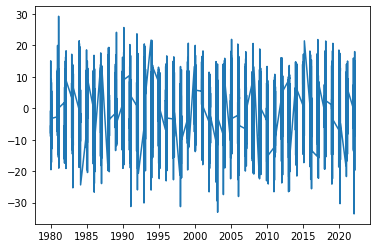

In [43]:
plt.plot(dc_6z_anoms['time'],dc_6z_anoms)

In [24]:
anoms_12z=hour12-climo_12z
anoms_12z

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120, hour: 1)>
array([[[[ -0.41607666],
         [ -0.3057251 ],
         [ -0.21789551],
         ...,
         [ -1.307251  ],
         [ -1.2349243 ],
         [ -1.1730347 ]],

        [[ -0.44152832],
         [ -0.3265381 ],
         [ -0.23858643],
         ...,
         [ -1.3308105 ],
         [ -1.3111572 ],
         [ -1.2838745 ]],

        [[ -0.4570923 ],
         [ -0.32995605],
         [ -0.2446289 ],
         ...,
...
         ...,
         [-13.625793  ],
         [-13.203003  ],
         [-12.830627  ]],

        [[ -8.492432  ],
         [ -7.5391235 ],
         [ -7.4368286 ],
         ...,
         [-11.932556  ],
         [-11.762085  ],
         [-11.561096  ]],

        [[ -7.770691  ],
         [ -7.592163  ],
         [ -7.5579224 ],
         ...,
         [-10.29657   ],
         [-10.272095  ],
         [-10.222595  ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T12:00:00 ... 2022-02-28T12:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 12

In [25]:
anoms_18z=hour18-climo_18z
anoms_18z

<xarray.DataArray 'SLP' (time: 3850, lat: 66, lon: 120, hour: 1)>
array([[[[ -0.96710205],
         [ -0.88726807],
         [ -0.80426025],
         ...,
         [ -1.4503784 ],
         [ -1.4039307 ],
         [ -1.3223877 ]],

        [[ -0.9284668 ],
         [ -0.8488159 ],
         [ -0.7817993 ],
         ...,
         [ -1.5153809 ],
         [ -1.4480591 ],
         [ -1.3816528 ]],

        [[ -0.8909302 ],
         [ -0.8222656 ],
         [ -0.756958  ],
         ...,
...
         ...,
         [-12.693665  ],
         [-12.8797    ],
         [-12.923218  ]],

        [[ -4.9369507 ],
         [ -4.659912  ],
         [ -4.7372437 ],
         ...,
         [-11.111572  ],
         [-11.530579  ],
         [-11.840881  ]],

        [[ -4.581726  ],
         [ -4.668457  ],
         [ -4.86499   ],
         ...,
         [ -9.57373   ],
         [-10.033936  ],
         [-10.459656  ]]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01T18:00:00 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 18

In [26]:
anoms_slp_all=xr.concat([anoms_00z,anoms_06z,anoms_12z,anoms_18z],dim='hour')
anoms_slp_all

<xarray.DataArray 'SLP' (time: 15400, lat: 66, lon: 120, hour: 4)>
array([[[[ -0.26611328,          nan,          nan,          nan],
         [ -0.21032715,          nan,          nan,          nan],
         [ -0.14086914,          nan,          nan,          nan],
         ...,
         [ -1.4719849 ,          nan,          nan,          nan],
         [ -1.4994507 ,          nan,          nan,          nan],
         [ -1.4883423 ,          nan,          nan,          nan]],

        [[ -0.2545166 ,          nan,          nan,          nan],
         [ -0.18206787,          nan,          nan,          nan],
         [ -0.10748291,          nan,          nan,          nan],
         ...,
         [ -1.4180298 ,          nan,          nan,          nan],
         [ -1.4810791 ,          nan,          nan,          nan],
         [ -1.4816284 ,          nan,          nan,          nan]],

        [[ -0.22381592,          nan,          nan,          nan],
         [ -0.15454102,          nan,          nan,          nan],
         [ -0.06658936,          nan,          nan,          nan],
         ...,
...
         [         nan,          nan,          nan, -12.693665  ],
         [         nan,          nan,          nan, -12.8797    ],
         [         nan,          nan,          nan, -12.923218  ]],

        [[         nan,          nan,          nan,  -4.9369507 ],
         [         nan,          nan,          nan,  -4.659912  ],
         [         nan,          nan,          nan,  -4.7372437 ],
         ...,
         [         nan,          nan,          nan, -11.111572  ],
         [         nan,          nan,          nan, -11.530579  ],
         [         nan,          nan,          nan, -11.840881  ]],

        [[         nan,          nan,          nan,  -4.581726  ],
         [         nan,          nan,          nan,  -4.668457  ],
         [         nan,          nan,          nan,  -4.86499   ],
         ...,
         [         nan,          nan,          nan,  -9.57373   ],
         [         nan,          nan,          nan, -10.033936  ],
         [         nan,          nan,          nan, -10.459656  ]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0 6 12 18

In [49]:
anoms_sorted=anoms_slp_all.sortby('time')
anoms_sorted

<xarray.DataArray 'SLP' (time: 15400, lat: 66, lon: 120, hour: 4)>
array([[[[ -0.26611328,          nan,          nan,          nan],
         [ -0.21032715,          nan,          nan,          nan],
         [ -0.14086914,          nan,          nan,          nan],
         ...,
         [ -1.4719849 ,          nan,          nan,          nan],
         [ -1.4994507 ,          nan,          nan,          nan],
         [ -1.4883423 ,          nan,          nan,          nan]],

        [[ -0.2545166 ,          nan,          nan,          nan],
         [ -0.18206787,          nan,          nan,          nan],
         [ -0.10748291,          nan,          nan,          nan],
         ...,
         [ -1.4180298 ,          nan,          nan,          nan],
         [ -1.4810791 ,          nan,          nan,          nan],
         [ -1.4816284 ,          nan,          nan,          nan]],

        [[ -0.22381592,          nan,          nan,          nan],
         [ -0.15454102,          nan,          nan,          nan],
         [ -0.06658936,          nan,          nan,          nan],
         ...,
...
         [         nan,          nan,          nan, -12.693665  ],
         [         nan,          nan,          nan, -12.8797    ],
         [         nan,          nan,          nan, -12.923218  ]],

        [[         nan,          nan,          nan,  -4.9369507 ],
         [         nan,          nan,          nan,  -4.659912  ],
         [         nan,          nan,          nan,  -4.7372437 ],
         ...,
         [         nan,          nan,          nan, -11.111572  ],
         [         nan,          nan,          nan, -11.530579  ],
         [         nan,          nan,          nan, -11.840881  ]],

        [[         nan,          nan,          nan,  -4.581726  ],
         [         nan,          nan,          nan,  -4.668457  ],
         [         nan,          nan,          nan,  -4.86499   ],
         ...,
         [         nan,          nan,          nan,  -9.57373   ],
         [         nan,          nan,          nan, -10.033936  ],
         [         nan,          nan,          nan, -10.459656  ]]]],
      dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0 6 12 18

In [30]:
anoms_sorted.to_netcdf('/project/xprecip/merra2_ncfiles/slp/anomalies/slp_6hr_anoms.nc')

In [31]:
f='/project/xprecip/merra2_ncfiles/slp/anomalies/slp_6hr_anoms.nc'
DS_slp_anoms=xr.open_dataset(f)
DS_slp_anoms

<xarray.Dataset>
Dimensions:  (hour: 4, lat: 66, lon: 120, time: 15400)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
  * hour     (hour) int64 0 6 12 18
Data variables:
    SLP      (time, lat, lon, hour) float32 ...

In [41]:
dc_anoms=DS_slp_anoms['SLP'].sel(lat=39,lon=-77,method='nearest')
dc_anoms

<xarray.DataArray 'SLP' (time: 15400, hour: 4)>
array([[-5.638611,       nan,       nan,       nan],
       [      nan, -5.665466,       nan,       nan],
       [      nan,       nan, -6.3927  ,       nan],
       ...,
       [      nan,  1.86731 ,       nan,       nan],
       [      nan,       nan,  5.453247,       nan],
       [      nan,       nan,       nan,  6.056885]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
    lon      float64 -76.88
    lat      float64 39.0
  * hour     (hour) int64 0 6 12 18

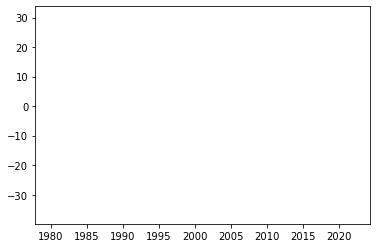

In [44]:
plt.plot(dc_anoms['time'],dc_anoms)

In [45]:
anoms_traditional=slp_hpa.groupby('time.hour')-slp_hpa.groupby('time.hour').mean(dim='time')
anoms_traditional

<xarray.DataArray 'SLP' (time: 15400, lat: 66, lon: 120)>
array([[[ -0.26757812,  -0.21154785,  -0.14245605, ...,  -1.4741211 ,
          -1.4992676 ,  -1.487793  ],
        [ -0.2531128 ,  -0.18426514,  -0.10845947, ...,  -1.4182129 ,
          -1.4815674 ,  -1.4829102 ],
        [ -0.22540283,  -0.1539917 ,  -0.06719971, ...,  -1.447815  ,
          -1.4485474 ,  -1.4768677 ],
        ...,
        [ -8.084473  ,  -7.7769775 ,  -7.6832275 , ..., -25.492676  ,
         -26.092163  , -26.264343  ],
        [ -7.6897583 ,  -7.331665  ,  -7.105591  , ..., -25.032776  ,
         -25.361511  , -25.378723  ],
        [ -6.6219482 ,  -6.632263  ,  -6.6431274 , ..., -24.337952  ,
         -24.341003  , -24.314392  ]],

       [[  0.07867432,   0.07116699,   0.07568359, ...,  -1.8831177 ,
          -1.8947754 ,  -1.9633179 ],
        [  0.05102539,   0.06634521,   0.06304932, ...,  -1.9154053 ,
          -1.9349365 ,  -1.982727  ],
        [  0.05419922,   0.05999756,   0.07043457, ...,  -1.9962158 ,
          -2.0027466 ,  -2.0094604 ],
...
        [ -8.487976  ,  -7.69928   ,  -7.538147  , ..., -13.619812  ,
         -13.196106  , -12.823364  ],
        [ -8.487976  ,  -7.536133  ,  -7.4332886 , ..., -11.926025  ,
         -11.756592  , -11.5546875 ],
        [ -7.7696533 ,  -7.590576  ,  -7.5568237 , ..., -10.290955  ,
         -10.265686  , -10.217163  ]],

       [[  2.5246582 ,   2.4082031 ,   2.317627  , ...,   0.31469727,
           0.37841797,   0.38775635],
        [  2.614685  ,   2.520691  ,   2.4298706 , ...,   0.41259766,
           0.42138672,   0.456604  ],
        [  2.725647  ,   2.6386108 ,   2.5421753 , ...,   0.46240234,
           0.4661255 ,   0.47198486],
        ...,
        [ -4.6830444 ,  -4.664734  ,  -5.2770386 , ..., -12.687744  ,
         -12.875366  , -12.919983  ],
        [ -4.9362793 ,  -4.660034  ,  -4.736511  , ..., -11.106934  ,
         -11.52417   , -11.832886  ],
        [ -4.5805664 ,  -4.6676636 ,  -4.864624  , ...,  -9.567505  ,
         -10.029968  , -10.453857  ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [52]:
slp_anoms_3yrs=anoms_traditional.sel(time=slice('1980-01-01','1983-02-28'))
slp_anoms_3yrs

<xarray.DataArray 'SLP' (time: 1320, lat: 66, lon: 120)>
array([[[-2.6757812e-01, -2.1154785e-01, -1.4245605e-01, ...,
         -1.4741211e+00, -1.4992676e+00, -1.4877930e+00],
        [-2.5311279e-01, -1.8426514e-01, -1.0845947e-01, ...,
         -1.4182129e+00, -1.4815674e+00, -1.4829102e+00],
        [-2.2540283e-01, -1.5399170e-01, -6.7199707e-02, ...,
         -1.4478149e+00, -1.4485474e+00, -1.4768677e+00],
        ...,
        [-8.0844727e+00, -7.7769775e+00, -7.6832275e+00, ...,
         -2.5492676e+01, -2.6092163e+01, -2.6264343e+01],
        [-7.6897583e+00, -7.3316650e+00, -7.1055908e+00, ...,
         -2.5032776e+01, -2.5361511e+01, -2.5378723e+01],
        [-6.6219482e+00, -6.6322632e+00, -6.6431274e+00, ...,
         -2.4337952e+01, -2.4341003e+01, -2.4314392e+01]],

       [[ 7.8674316e-02,  7.1166992e-02,  7.5683594e-02, ...,
         -1.8831177e+00, -1.8947754e+00, -1.9633179e+00],
        [ 5.1025391e-02,  6.6345215e-02,  6.3049316e-02, ...,
         -1.9154053e+00, -1.9349365e+00, -1.9827271e+00],
        [ 5.4199219e-02,  5.9997559e-02,  7.0434570e-02, ...,
         -1.9962158e+00, -2.0027466e+00, -2.0094604e+00],
...
        [-4.9105835e+00, -4.2285156e+00, -3.1653442e+00, ...,
          2.1437988e+00,  1.1309204e+00, -2.0678711e-01],
        [-3.3256226e+00, -2.5040894e+00, -2.3263550e+00, ...,
          2.3063965e+00,  1.2932739e+00, -1.6729736e-01],
        [-1.4332886e+00, -1.3702393e+00, -1.6494141e+00, ...,
          2.4730835e+00,  1.3071289e+00, -2.4060059e-01]],

       [[-3.6815186e+00, -3.6012573e+00, -3.4743042e+00, ...,
          5.0860596e-01,  5.1062012e-01,  5.3997803e-01],
        [-4.1622314e+00, -4.0513306e+00, -3.9046021e+00, ...,
          4.2224121e-01,  3.6859131e-01,  3.2379150e-01],
        [-4.6946411e+00, -4.5291748e+00, -4.3698120e+00, ...,
          3.6956787e-01,  2.8082275e-01,  1.9006348e-01],
        ...,
        [-6.0939331e+00, -5.3910522e+00, -4.4738159e+00, ...,
          7.6165771e+00,  6.8535767e+00,  5.9580688e+00],
        [-4.3774414e+00, -3.7371826e+00, -3.7462158e+00, ...,
          7.3277588e+00,  6.5857544e+00,  5.7059326e+00],
        [-2.6171265e+00, -2.4876099e+00, -2.8817749e+00, ...,
          7.0163574e+00,  6.3361816e+00,  5.4489746e+00]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [53]:
slp_anoms_3yrs.to_netcdf('/project/xprecip/merra2_ncfiles/slp/anomalies/slp_anoms_traditional_unfiltered_smaller.nc')

In [50]:
dc_anoms=anoms_traditional.sel(lat=39,lon=-77,method='nearest')
dc_anoms

<xarray.DataArray 'SLP' (time: 15400)>
array([-5.6363525, -5.666992 , -6.392151 , ...,  1.8657837,  5.4537964,
        6.056946 ], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 2022-02-28T18:00:00
    lon      float64 -76.88
    lat      float64 39.0
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

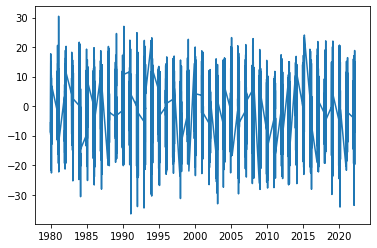

In [51]:
plt.plot(dc_anoms['time'],dc_anoms)

In [3]:
f='/project/xprecip/merra2_ncfiles/slp/anomalies/slp_anoms_traditional_unfiltered_smaller.nc'
DS_slp_anoms=xr.open_dataset(f)
DS_slp_anoms

<xarray.Dataset>
Dimensions:  (lat: 66, lon: 120, time: 1320)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 ...
Data variables:
    SLP      (time, lat, lon) float32 ...

In [4]:
slp_anoms=DS_slp_anoms['SLP']
slp_anoms

<xarray.DataArray 'SLP' (time: 1320, lat: 66, lon: 120)>
[10454400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [5]:
slp_sorted=slp_anoms.sortby('time')
slp_sorted

<xarray.DataArray 'SLP' (time: 1320, lat: 66, lon: 120)>
[10454400 values with dtype=float32]
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [6]:
slp_nonans=slp_sorted.dropna(dim='time')
slp_nonans

<xarray.DataArray 'SLP' (time: 1320, lat: 66, lon: 120)>
array([[[ -0.267578,  -0.211548, ...,  -1.499268,  -1.487793],
        [ -0.253113,  -0.184265, ...,  -1.481567,  -1.48291 ],
        ...,
        [ -7.689758,  -7.331665, ..., -25.361511, -25.378723],
        [ -6.621948,  -6.632263, ..., -24.341003, -24.314392]],

       [[  0.078674,   0.071167, ...,  -1.894775,  -1.963318],
        [  0.051025,   0.066345, ...,  -1.934937,  -1.982727],
        ...,
        [ -3.827393,  -3.523132, ..., -21.807373, -22.08319 ],
        [ -3.362244,  -3.640503, ..., -21.741577, -22.130249]],

       ...,

       [[ -2.335144,  -2.177673, ...,   0.753235,   0.816589],
        [ -2.788208,  -2.619629, ...,   0.536865,   0.610596],
        ...,
        [ -3.325623,  -2.504089, ...,   1.293274,  -0.167297],
        [ -1.433289,  -1.370239, ...,   1.307129,  -0.240601]],

       [[ -3.681519,  -3.601257, ...,   0.51062 ,   0.539978],
        [ -4.162231,  -4.051331, ...,   0.368591,   0.323792],
        ...,
        [ -4.377441,  -3.737183, ...,   6.585754,   5.705933],
        [ -2.617126,  -2.48761 , ...,   6.336182,   5.448975]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18

In [7]:
np.median(slp_nonans['lat'].values)

37.25

In [15]:
#slp_mins=slp_nonans.min(dim=('lat','lon'))
#slp_mins

In [8]:
ts_1=slp_nonans['time']
ts_1
nlats=len(slp_nonans['lat'])
nlons=len(slp_nonans['lon'])

In [5]:
'''
dates=[]
for i in range(1980,1984,1):
    year_of_data=slp_nonans.sel(time=slice(str(i)+"-01-01",str(i)+"-12-31")).values
    time_oneyear=ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values
    slp_min=np.nanmin(year_of_data,axis=0)
    for k in range(0,nlats):
        for j in range(0,nlons):
            i_match = (np.asarray((np.where(year_of_data[:,k,j]==slp_min[k,j])))).flatten()
            #print(i_match)
            if i_match.size>0:
                    for n in range(len(i_match)):
                        slp_dates = time_oneyear[np.squeeze(i_match[n])]
            print(slp_dates)
                        #slp_dates_integer = int(str(slp_dates)[0:4] + str(slp_dates)[5:7]+ str(slp_dates)[8:10])
                        #dates.append(slp_dates)
'''

'\ndates=[]\nfor i in range(1980,1984,1):\n    year_of_data=slp_nonans.sel(time=slice(str(i)+"-01-01",str(i)+"-12-31")).values\n    time_oneyear=ts_1.sel(time=slice(str(i)+"-01-01", str(i) +"-12-31")).values\n    slp_min=np.nanmin(year_of_data,axis=0)\n    for k in range(0,nlats):\n        for j in range(0,nlons):\n            i_match = (np.asarray((np.where(year_of_data[:,k,j]==slp_min[k,j])))).flatten()\n            #print(i_match)\n            if i_match.size>0:\n                    for n in range(len(i_match)):\n                        slp_dates = time_oneyear[np.squeeze(i_match[n])]\n            print(slp_dates)\n                        #slp_dates_integer = int(str(slp_dates)[0:4] + str(slp_dates)[5:7]+ str(slp_dates)[8:10])\n                        #dates.append(slp_dates)\n'

In [ ]:
#Try to identify 5-7 tracks


In [6]:
#print(dates)

In [54]:
#alternative
slp=[]
args=[]
slp_min=[]
for i in range(0,len(slp_nonans['time'])):
    each_point=slp_nonans[i,:,:].values
    #times = slp_nonans['time'].sel(time = slice(str(i)+"-01-01",str(i)+"-12-31")).values
    #slp_min_loc=each_point.where(each_point==np.nanmin(each_point))
    #slp.append(slp_min_loc)
    #idx=np.array(np.where(each_point==np.nanmin(each_point)))
    #print(times[idx])
    slp_min.append(np.nanmin(each_point))
    #args.append(idx)


In [7]:
#print(slp_min)

In [8]:
#slp_min_array=np.asarray(slp_min)
#slp_min_array

In [9]:
#slp_times=xr.concat(slp,dim='time')
#print(slp_times)

### Fast Fourier Transform

In [9]:
import xrft

In [10]:
Fda = xrft.fft(slp_nonans, dim="lat", true_phase=True, true_amplitude=True)
Fda

<xarray.DataArray (time: 1320, freq_lat: 66, lon: 120)>
array([[[ 1.27139282e+00-1.65275152e-14j,
          1.89788818e+00-2.48406073e-14j,
          1.99545288e+00-2.66384554e-14j, ...,
          5.33264160e+00-6.90350903e-14j,
          5.43890381e+00-7.14988351e-14j,
          5.44763184e+00-7.38304549e-14j],
        [-8.50482128e-01+8.45087618e-01j,
         -1.32516929e+00+1.14445062e+00j,
         -1.58349397e+00+1.27578822e+00j, ...,
         -3.87531765e+00+4.16442411e+00j,
         -3.74490910e+00+4.11116626e+00j,
         -3.68936587e+00+4.13234279e+00j],
        [-1.33749883e-01-1.26897439e+00j,
          3.16698223e-01-1.61580055e+00j,
          2.56867374e-01-1.93668260e+00j, ...,
         -3.95703746e-01-5.56432944e+00j,
         -3.09795695e-01-5.71850419e+00j,
         -2.79167739e-01-5.59451706e+00j],
        ...,
        [ 1.00215326e+00-6.04320394e-01j,
...
         -1.44240524e-01+1.10300990e+00j],
        ...,
        [-2.17307595e-01+7.12166429e-01j,
          1.02432871e-01+4.66109377e-01j,
         -2.67845240e-01+6.94819165e-01j, ...,
         -1.28008452e+00+1.11437246e+00j,
         -9.69415027e-01+9.21976064e-01j,
         -7.54484766e-01+6.33141057e-01j],
        [-2.28243763e-01-5.91714217e-01j,
         -2.99597636e-01-5.43386056e-01j,
          2.33055471e-02-5.70625893e-01j, ...,
          1.43166136e-01-1.62845263e+00j,
         -1.54379567e-01-1.38665463e+00j,
         -1.44240524e-01-1.10300990e+00j],
        [ 6.68985391e-01+4.05997927e-01j,
          6.83273689e-01+2.26709531e-01j,
          3.72000003e-01+3.18399601e-01j, ...,
          8.27666194e-01+1.15015794e+00j,
          1.17591776e+00+9.87893304e-01j,
          1.03978680e+00+8.35391442e-01j]]])
Coordinates:
  * time      (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon       (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
    hour      (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18
  * freq_lat  (freq_lat) float64 -1.0 -0.9697 -0.9394 ... 0.9091 0.9394 0.9697

In [11]:
Fda_1 = xrft.ifft(Fda, dim="freq_lat", true_phase=True, true_amplitude=True, lag=37.5)
Fda_1

<xarray.DataArray (time: 1320, lat: 66, lon: 120)>
array([[[-2.67578125e-01+1.59338833e-16j,
         -2.11547852e-01-1.71490738e-16j,
         -1.42456055e-01-6.71461134e-16j, ...,
         -1.47412109e+00-1.09283073e-15j,
         -1.49926758e+00-2.55246916e-15j,
         -1.48779297e+00-2.68918523e-15j],
        [-2.53112793e-01-2.38047123e-16j,
         -1.84265137e-01+5.29981059e-17j,
         -1.08459473e-01+2.76008721e-16j, ...,
         -1.41821289e+00+1.02195368e-15j,
         -1.48156738e+00-5.92425114e-17j,
         -1.48291016e+00-1.41534697e-15j],
        [-2.25402832e-01+7.37387760e-16j,
         -1.53991699e-01+3.39058667e-16j,
         -6.71997070e-02+1.41953885e-16j, ...,
         -1.44781494e+00+6.64983379e-16j,
         -1.44854736e+00-1.28556653e-16j,
         -1.47686768e+00-1.20620510e-15j],
        ...,
        [-8.08447266e+00-1.61474569e-17j,
...
          1.90063477e-01-6.67062726e-17j],
        ...,
        [-6.09393311e+00+9.70974931e-16j,
         -5.39105225e+00+7.19562758e-16j,
         -4.47381592e+00+2.53495015e-16j, ...,
          7.61657715e+00+5.79420379e-18j,
          6.85357666e+00+1.55827898e-16j,
          5.95806885e+00+1.87026572e-16j],
        [-4.37744141e+00+2.46049413e-15j,
         -3.73718262e+00-2.71792148e-16j,
         -3.74621582e+00-7.73804562e-16j, ...,
          7.32775879e+00-4.52990435e-16j,
          6.58575439e+00-1.17151333e-16j,
          5.70593262e+00-2.78922410e-16j],
        [-2.61712646e+00+2.19426848e-15j,
         -2.48760986e+00+1.23711552e-15j,
         -2.88177490e+00+8.42988057e-16j, ...,
          7.01635742e+00+1.78749497e-18j,
          6.33618164e+00-3.70976110e-16j,
          5.44897461e+00+5.53275313e-16j]]])
Coordinates:
  * time     (time) datetime64[ns] 1980-01-01 ... 1983-02-28T18:00:00
  * lon      (lon) float64 -127.5 -126.9 -126.2 -125.6 ... -54.38 -53.75 -53.12
    hour     (time) int64 0 6 12 18 0 6 12 18 0 6 ... 12 18 0 6 12 18 0 6 12 18
  * lat      (lat) float64 21.0 21.5 22.0 22.5 23.0 ... 51.5 52.0 52.5 53.0 53.5

In [24]:
Fda_1.to_netcdf('/project/xprecip/merra2_ncfiles/slp/anomalies/fft_slpanoms_1-27-23.nc')

TypeError: illegal primitive data type, must be one of dict_keys(['S1', 'i1', 'u1', 'i2', 'u2', 'i4', 'u4', 'i8', 'u8', 'f4', 'f8']), got complex128

In [7]:
slp_fft=np.fft.fft2(slp_nonans)
slp_fft

array([[[-22975.21923828    +0.j        ,
          -7803.61363597-17666.28148853j,
            265.38136407 -3551.99177947j, ...,
          -1466.95982699 +6632.54913969j,
            265.38136407 +3551.99177947j,
          -7803.61363597+17666.28148853j],
        [  -539.4061237  -2782.0180489j ,
          -6553.09159256 +1072.55573503j,
           3490.70603399 -3030.16324377j, ...,
          -1711.85998896 -1537.56220785j,
          -3546.61542014 -4196.45875068j,
           -165.9181343  -5540.94350583j],
        [   314.39935829 -5898.99150946j,
           2032.36516969 -3059.0273989j ,
           1133.53288962 -1011.77809066j, ...,
          -1210.99848877  +586.12661143j,
          -2617.84971361 -1127.41569116j,
          -1718.75207345 -2190.61972367j],
        ...,
        [   162.55861555 +2115.86370664j,
            -62.96308545  +867.47784235j,
           -466.19493535  +820.32150396j, ...,
            550.66609166  -543.90824673j,
            791.4703838   +431.12731913j

In [12]:
import scipy
slp_filter=scipy.fft.fft2(slp_nonans,axes=(1,2))
slp_filter

array([[[-22975.219       -0.j      ,  -7803.614   -17666.281j   ,
            265.38162  -3551.9917j  , ...,  -1466.96     +6632.5493j  ,
            265.38162  +3551.9917j  ,  -7803.614   +17666.281j   ],
        [  -539.4061   -2782.018j   ,  -6553.092    +1072.5557j  ,
           3490.7063   -3030.1636j  , ...,  -1711.8599   -1537.5623j  ,
          -3546.6155   -4196.459j   ,   -165.91818  -5540.944j   ],
        [   314.3993   -5898.9917j  ,   2032.3652   -3059.0278j  ,
           1133.533    -1011.7781j  , ...,  -1210.9985    +586.1267j  ,
          -2617.8496   -1127.4156j  ,  -1718.7521   -2190.6196j  ],
        ...,
        [   162.55862  +2115.8638j  ,    -62.963135  +867.47766j ,
           -466.19507   +820.32153j , ...,    550.66614   -543.9082j  ,
            791.47046   +431.12723j ,    388.02298  +1319.0127j  ],
        [   314.3993   +5898.9917j  ,  -1718.7521   +2190.6196j  ,
          -2617.8496   +1127.4156j  , ...,    996.11707  +1505.7739j  ,
           1133.533 

In [13]:
scipy.fft.ifft2(slp_filter)

array([[[-2.6757812e-01-7.80391929e-08j, -2.1154761e-01+1.56612430e-07j,
         -1.4245582e-01-8.36271283e-08j, ...,
         -1.4741215e+00+2.34979538e-08j, -1.4992673e+00+3.46635041e-08j,
         -1.4877927e+00-1.59790417e-07j],
        [-2.5311291e-01+3.90618197e-07j, -1.8426490e-01+1.49429368e-07j,
         -1.0845935e-01+2.12032631e-08j, ...,
         -1.4182124e+00+3.69253371e-07j, -1.4815676e+00+4.20780225e-07j,
         -1.4829102e+00+4.62676269e-07j],
        [-2.2540283e-01+4.78964637e-07j, -1.5399194e-01+3.76021120e-07j,
         -6.7199945e-02+4.71979718e-07j, ...,
         -1.4478161e+00+1.76358981e-07j, -1.4485477e+00+4.47052400e-07j,
         -1.4768682e+00+2.46675938e-07j],
        ...,
        [-8.0844727e+00+9.95190241e-09j, -7.7769766e+00-3.46680679e-07j,
         -7.6832275e+00+2.33469322e-07j, ...,
         -2.5492676e+01-1.48800524e-07j, -2.6092165e+01+1.57302694e-07j,
         -2.6264345e+01+1.58186836e-07j],
        [-7.6897569e+00-1.15688110e-07j, -7.3316646

### Spherical Harmonics

In [18]:
#zonal wavenumber 
m=np.arange(5,71,1)
print(m)

[ 5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28
 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52
 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [19]:
#n: degree (must be greater or equal to 0)
n=np.arange(0,71,1)
print(n)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54 55 56 57 58 59 60 61 62 63 64 65 66 67 68 69 70]


In [12]:
lon=slp_anoms['lon'].values
new_lon=lon % 360
#print(new_lon)
lon_radians=np.radians(new_lon)
print(lon_radians)

[4.05789051 4.06879882 4.07970713 4.09061543 4.10152374 4.11243205
 4.12334036 4.13424867 4.14515697 4.15606528 4.16697359 4.1778819
 4.1887902  4.19969851 4.21060682 4.22151513 4.23242344 4.24333174
 4.25424005 4.26514836 4.27605667 4.28696498 4.29787328 4.30878159
 4.3196899  4.33059821 4.34150651 4.35241482 4.36332313 4.37423144
 4.38513975 4.39604805 4.40695636 4.41786467 4.42877298 4.43968128
 4.45058959 4.4614979  4.47240621 4.48331452 4.49422282 4.50513113
 4.51603944 4.52694775 4.53785606 4.54876436 4.55967267 4.57058098
 4.58148929 4.59239759 4.6033059  4.61421421 4.62512252 4.63603083
 4.64693913 4.65784744 4.66875575 4.67966406 4.69057236 4.70148067
 4.71238898 4.72329729 4.7342056  4.7451139  4.75602221 4.76693052
 4.77783883 4.78874714 4.79965544 4.81056375 4.82147206 4.83238037
 4.84328867 4.85419698 4.86510529 4.8760136  4.88692191 4.89783021
 4.90873852 4.91964683 4.93055514 4.94146344 4.95237175 4.96328006
 4.97418837 4.98509668 4.99600498 5.00691329 5.0178216  5.02872

In [13]:
lat=slp_anoms['lat'].values
#print(lat)
colatitude=90-lat
print(colatitude)

[69.  68.5 68.  67.5 67.  66.5 66.  65.5 65.  64.5 64.  63.5 63.  62.5
 62.  61.5 61.  60.5 60.  59.5 59.  58.5 58.  57.5 57.  56.5 56.  55.5
 55.  54.5 54.  53.5 53.  52.5 52.  51.5 51.  50.5 50.  49.5 49.  48.5
 48.  47.5 47.  46.5 46.  45.5 45.  44.5 44.  43.5 43.  42.5 42.  41.5
 41.  40.5 40.  39.5 39.  38.5 38.  37.5 37.  36.5]


In [16]:
#Creates a 2D grid of (theta,pi)
theta,phi=np.meshgrid(lon_radians,colatitude)


[[4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]
 [4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]
 [4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]
 ...
 [4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]
 [4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]
 [4.05789051 4.06879882 4.07970713 ... 5.33416253 5.34507083 5.35597914]]


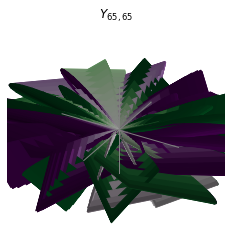

In [25]:
import matplotlib.gridspec as gridspec
from scipy.special import sph_harm
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

# Calculate the Cartesian coordinates of each point in the mesh.
xyz = np.array([np.sin(theta) * np.sin(phi),
                np.sin(theta) * np.cos(phi),
                np.cos(theta)])

def plot_Y(ax, el, m):
    """Plot the spherical harmonic of degree el and order m on Axes ax."""

    # NB In SciPy's sph_harm function the azimuthal coordinate, theta,
    # comes before the polar coordinate, phi.
    Y = sph_harm(abs(m), el, phi, theta)

    # Linear combination of Y_l,m and Y_l,-m to create the real form.
    if m < 0:
        Y = np.sqrt(2) * (-1)**m * Y.imag
    elif m > 0:
        Y = np.sqrt(2) * (-1)**m * Y.real
    Yx, Yy, Yz = np.abs(Y) * xyz

    # Colour the plotted surface according to the sign of Y.
    cmap = plt.cm.ScalarMappable(cmap=plt.get_cmap('PRGn'))
    cmap.set_clim(-0.5, 0.5)

    ax.plot_surface(Yx, Yy, Yz,
                    facecolors=cmap.to_rgba(Y.real),
                    rstride=2, cstride=2)

    # Draw a set of x, y, z axes for reference.
    ax_lim = 0.5
    ax.plot([-ax_lim, ax_lim], [0,0], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [-ax_lim, ax_lim], [0,0], c='0.5', lw=1, zorder=10)
    ax.plot([0,0], [0,0], [-ax_lim, ax_lim], c='0.5', lw=1, zorder=10)
    # Set the Axes limits and title, turn off the Axes frame.
    ax.set_title(r'$Y_{{{},{}}}$'.format(el, m))
    ax_lim = 0.5
    ax.set_xlim(-ax_lim, ax_lim)
    ax.set_ylim(-ax_lim, ax_lim)
    ax.set_zlim(-ax_lim, ax_lim)
    ax.axis('off')

fig = plt.figure(figsize=plt.figaspect(1.))
ax = fig.add_subplot(projection='3d')
l, m = 65, 65
plot_Y(ax, l, m)
#plt.savefig('Y{}_{}.png'.format(l, m))
plt.show()

#scipy.special.sph_harm(m,n,lon_radians,colatitude)